In [1]:
%matplotlib inline

In [2]:
#NEWCOMMENTS
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


In [3]:
# Files to load
overall_homeless_data_to_load = "Resources/MD_County_Homeless.csv"
homeless_by_county__data_to_load = "Resources/MD_Homeless_PerCounty.csv"

In [4]:
# Read School and Student Data Files and store into Pandas DataFrames
overall_homeless_data = pd.read_csv(overall_homeless_data_to_load) 
homeless_by_county_data = pd.read_csv(homeless_by_county__data_to_load)

In [5]:
# Combine overall homeless and homeless by county data into a single dataset.  
homeless_data_complete = pd.merge(overall_homeless_data, homeless_by_county_data, how="left", on=["County_ID", "County_ID"])

#homeless_data_complete.apply(lambda x: x.str.replace(',', '').astype(float), axis=1)
#df.read_csv('foo.tsv', sep='\t', thousands=',')

homeless_data_complete.head()

,County_ID,County_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total,Overall Homeless 2019,Overall Homeless 2018,...,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Non-Hispanic,Overall Homeless - Hispanic/Latino,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,MD-500,Allegany County,"32,253","30,618","1,635",5.1,"48,170",55.6,145,79,...,98,47,145,0,119,14,0,0,0,12
1,MD-501,Baltimore city,"287,760","273,351","14,409",5.0,"49,780",57.5,"2,294","2,508",...,631,"1,660","2,234",60,602,"1,609",15,25,8,35
2,MD-502,Harford County,"143,572","138,927","4,645",3.2,"91,492",105.6,228,190,...,100,127,204,24,116,83,1,2,0,26
3,MD-503,Anne Arundel County,"321,069","311,556","9,513",3.0,"100,916",116.5,302,366,...,112,189,296,6,164,118,1,1,0,18
4,MD-504,Howard County,"191,529","186,427","5,102",2.7,"121,329",140.0,201,168,...,93,107,192,9,45,132,2,5,1,16


In [6]:
#homeless_data_complete.columns
homeless_col=['Civilian_labor_force', 'Employed',
       'Unemployed', 'Unemployment_rate', 'Median_Household_Income',
       'Med_HH_Income_Percent_of_State_Total', 'Overall Homeless 2019',
       'Overall Homeless 2018', 'Overall Homeless 2017',
       'Overall Homeless 2016', 'Overall Homeless 2015',
       'Overall Homeless - Under 18 ', 'Overall Homeless - Age 18 to 24',
       'Overall Homeless - Over 24', 'Overall Homeless - Female',
       'Overall Homeless - Male', 'Overall Homeless - Non-Hispanic',
       'Overall Homeless - Hispanic/Latino', 'Overall Homeless - White',
       'Overall Homeless - Black or African American',
       'Overall Homeless - Asian',
       'Overall Homeless - American Indian or Alaska Native',
       'Overall Homeless - Native Hawaiian or Other Pacific Islander',
       'Overall Homeless - Multiple Races']

In [7]:
for i in homeless_col:
    try:
        print(i)
        print(homeless_data_complete[i])
        homeless_data_complete[i]= homeless_data_complete[i].str.replace(',', '').astype(float)
    
    except:
        print("Error")
    pass

Civilian_labor_force
0      32,253
1     287,760
2     143,572
3     321,069
4     191,529
5     459,091
6      96,933
7      53,891
8      65,682
9     137,920
10     15,981
11     18,469
12     74,861
13     28,749
14    513,748
15    565,463
Name: Civilian_labor_force, dtype: object
Employed
0      30,618
1     273,351
2     138,927
3     311,556
4     186,427
5     442,597
6      94,187
7      51,812
8      63,492
9     133,683
10     15,301
11     17,815
12     72,015
13     27,162
14    494,934
15    549,296
Name: Employed, dtype: object
Unemployed
0      1,635
1     14,409
2      4,645
3      9,513
4      5,102
5     16,494
6      2,746
7      2,079
8      2,190
9      4,237
10       680
11       654
12     2,846
13     1,588
14    18,814
15    16,167
Name: Unemployed, dtype: object
Unemployment_rate
0     5.1
1     5.0
2     3.2
3     3.0
4     2.7
5     3.6
6     2.8
7     3.9
8     3.0
9     3.1
10    4.3
11    4.0
12    3.8
13    6.0
14    3.7
15    2.9
Name: Unemployment_ra

In [8]:
homeless_data_complete.head()

,County_ID,County_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total,Overall Homeless 2019,Overall Homeless 2018,...,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Non-Hispanic,Overall Homeless - Hispanic/Latino,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,MD-500,Allegany County,32253.0,30618.0,1635.0,5.1,48170.0,55.6,145.0,79.0,...,98,47.0,145.0,0,119,14.0,0,0,0,12
1,MD-501,Baltimore city,287760.0,273351.0,14409.0,5.0,49780.0,57.5,2294.0,2508.0,...,631,1660.0,2234.0,60,602,1609.0,15,25,8,35
2,MD-502,Harford County,143572.0,138927.0,4645.0,3.2,91492.0,105.6,228.0,190.0,...,100,127.0,204.0,24,116,83.0,1,2,0,26
3,MD-503,Anne Arundel County,321069.0,311556.0,9513.0,3.0,100916.0,116.5,302.0,366.0,...,112,189.0,296.0,6,164,118.0,1,1,0,18
4,MD-504,Howard County,191529.0,186427.0,5102.0,2.7,121329.0,140.0,201.0,168.0,...,93,107.0,192.0,9,45,132.0,2,5,1,16


In [9]:
#homeless_data_complete.apply(lambda x: x.str.replace(',', '').astype(float), axis=1)

In [10]:
homeless_data_complete.head()


,County_ID,County_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total,Overall Homeless 2019,Overall Homeless 2018,...,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Non-Hispanic,Overall Homeless - Hispanic/Latino,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,MD-500,Allegany County,32253.0,30618.0,1635.0,5.1,48170.0,55.6,145.0,79.0,...,98,47.0,145.0,0,119,14.0,0,0,0,12
1,MD-501,Baltimore city,287760.0,273351.0,14409.0,5.0,49780.0,57.5,2294.0,2508.0,...,631,1660.0,2234.0,60,602,1609.0,15,25,8,35
2,MD-502,Harford County,143572.0,138927.0,4645.0,3.2,91492.0,105.6,228.0,190.0,...,100,127.0,204.0,24,116,83.0,1,2,0,26
3,MD-503,Anne Arundel County,321069.0,311556.0,9513.0,3.0,100916.0,116.5,302.0,366.0,...,112,189.0,296.0,6,164,118.0,1,1,0,18
4,MD-504,Howard County,191529.0,186427.0,5102.0,2.7,121329.0,140.0,201.0,168.0,...,93,107.0,192.0,9,45,132.0,2,5,1,16


Using Pandas to Chart a DataFrame

In [11]:
# Filter the DataFrame down only to those columns to chart
county_and_unemployment = homeless_data_complete[["County_name","Overall Homeless 2019"]]

# Set the index to be "State" so they will be used as labels
#county_and_unemployment = state_and_inches.set_index("State")

county_and_unemployment.head()

,County_name,Overall Homeless 2019
0,Allegany County,145.0
1,Baltimore city,2294.0
2,Harford County,228.0
3,Anne Arundel County,302.0
4,Howard County,201.0


In [12]:
counties = ["Allegany County","Baltimore city","Harford County","Anne Arundel County","Howard County","Baltimore County","Carroll County","Cecil County","Charles, Calvert, St.Mary's Counties","Frederick County","Garrett County","Mid-Shore Regional Counties","Washington County","Wicomico, Somerset, Worcester Counties","Prince George's County","Montgomery County"]

x_axis = np.arange(0, len(counties))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

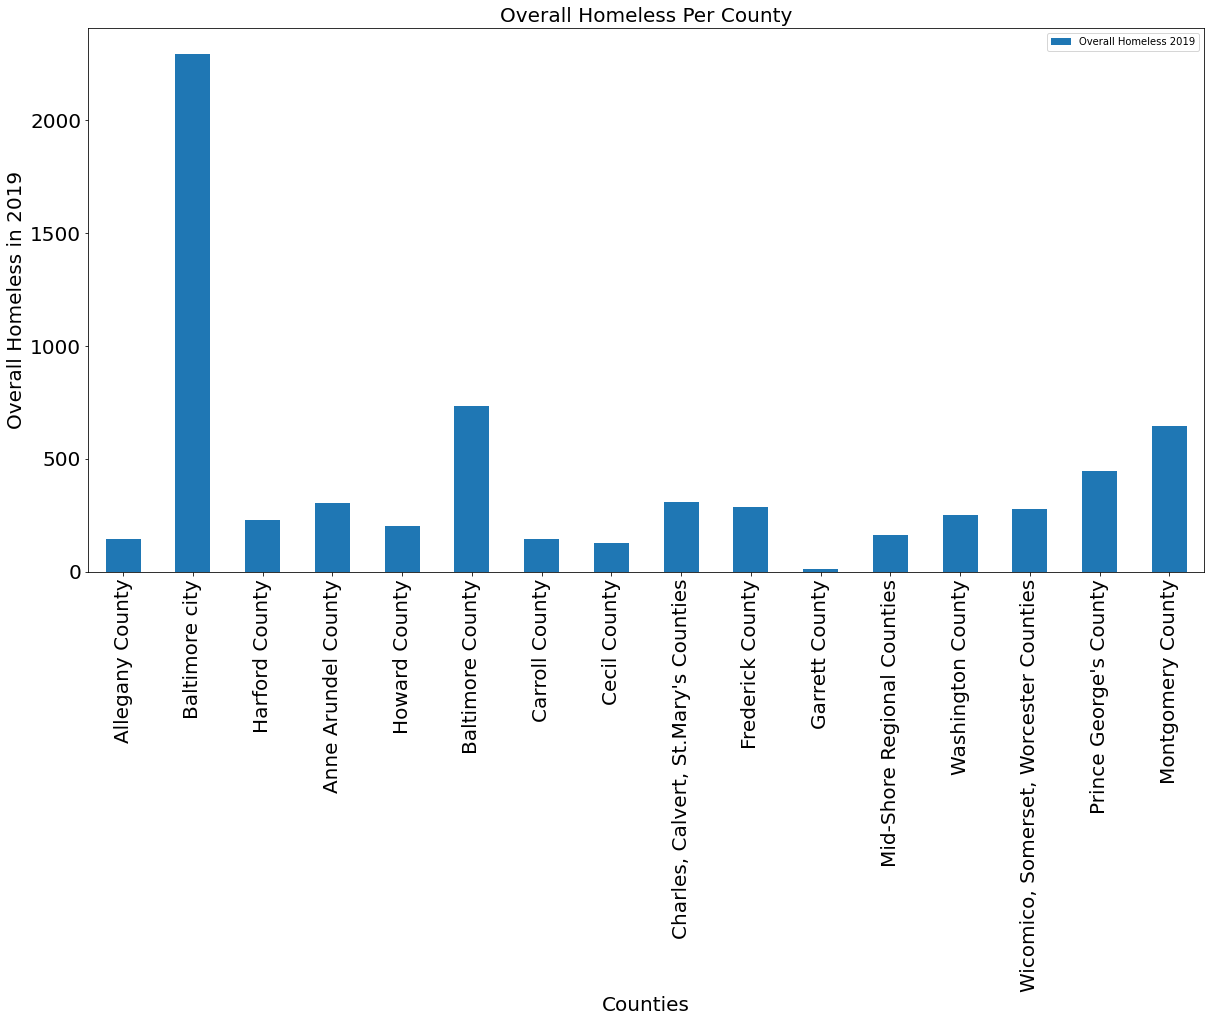

<Figure size 432x288 with 0 Axes>

In [13]:
# Use DataFrame.plot() in order to create a bar chart of the data
county_and_unemployment.plot(kind="bar", figsize=(20,10), fontsize = 20)

# Set a title for the chart
plt.title("Overall Homeless Per County", fontsize = 20)
plt.xlabel("Counties", fontsize =20)
plt.ylabel("Overall Homeless in 2019", fontsize = 20)

#Locate x-axis heaaders
plt.xticks(tick_locations, counties, rotation = "vertical")
plt.show()


plt.show()
plt.tight_layout()

In [14]:
unemploy_df = homeless_data_complete[["County_name","Overall Homeless 2019","Unemployment_rate"]]
unemploy_df

,County_name,Overall Homeless 2019,Unemployment_rate
0,Allegany County,145.0,5.1
1,Baltimore city,2294.0,5.0
2,Harford County,228.0,3.2
3,Anne Arundel County,302.0,3.0
4,Howard County,201.0,2.7
5,Baltimore County,735.0,3.6
6,Carroll County,144.0,2.8
7,Cecil County,126.0,3.9
8,"Charles, Calvert, St.Mary's Counties",306.0,3.0
9,Frederick County,286.0,3.1


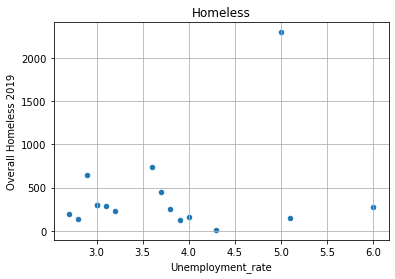

In [15]:
#check correlation between homelesness and employment 
# Plot scatter plot
unemploy_df.plot(kind="scatter", x="Unemployment_rate", y="Overall Homeless 2019", grid=True,  title="Homeless")

# Show plot
plt.show()                                                                       

In [17]:
years_df = homeless_data_complete[["County_name","Overall Homeless 2015","Overall Homeless 2016","Overall Homeless 2017","Overall Homeless 2018","Overall Homeless 2019"]]

years_df.head(16)
years_df.set_index('County_name',inplace=True)
years_df_transposed = years_df.T # or df1.transpose()
years_df.T


County_name,Allegany County,Baltimore city,Harford County,Anne Arundel County,Howard County,Baltimore County,Carroll County,Cecil County,"Charles, Calvert, St.Mary's Counties",Frederick County,Garrett County,Mid-Shore Regional Counties,Washington County,"Wicomico, Somerset, Worcester Counties",Prince George's County,Montgomery County
Overall Homeless 2015,96.0,2796.0,210.0,335.0,166.0,745.0,140.0,191.0,981.0,311.0,9.0,158.0,201.0,326.0,625.0,1100.0
Overall Homeless 2016,124.0,2725.0,179.0,390.0,214.0,763.0,136.0,167.0,464.0,349.0,20.0,138.0,233.0,262.0,544.0,981.0
Overall Homeless 2017,118.0,2669.0,189.0,376.0,168.0,609.0,147.0,193.0,419.0,309.0,10.0,153.0,208.0,260.0,525.0,894.0
Overall Homeless 2018,79.0,2508.0,190.0,366.0,168.0,758.0,173.0,129.0,492.0,316.0,15.0,141.0,199.0,292.0,478.0,840.0
Overall Homeless 2019,145.0,2294.0,228.0,302.0,201.0,735.0,144.0,126.0,306.0,286.0,12.0,164.0,249.0,275.0,447.0,647.0


In [18]:
trend_df = years_df.T
trend_df.index=["2015", "2016", "2017", "2018", "2019"]

Text(0, 0.5, 'Counties')

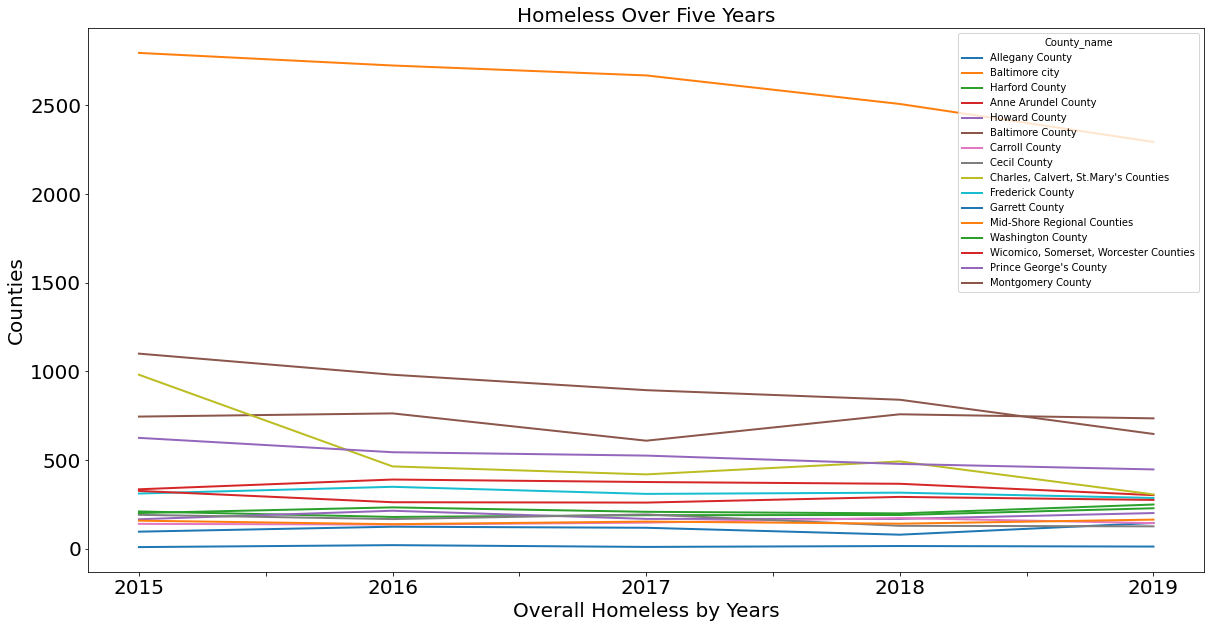

In [19]:
trend_df.plot(figsize=(20,10), linewidth=2, fontsize=20)

plt.title("Homeless Over Five Years",fontsize=20)
plt.xlabel("Overall Homeless by Years",fontsize=20)
plt.ylabel("Counties",fontsize=20)

#Locate x-axis heaaders


The graph analyses homeless trends by county over a five year period.  Baltimore County has the highest unemployment rate, which has been on a steady decline from 2796 in 2015 to 2294 homeless people in 2019.  Also Montgomery County, Charles, Calvert, St. Mary’s Counties and Prince George's County’ homeless numbers have been declining steadily from 1100, 981, 625 to 647, 306, 447 respectively. Other counties have had insignificant fluctuations over time, except for Baltimore County that shows a significant reduction in numbers in 2017, which “adjusted back” to the normal range the following year.  Our assumption was that there may have been under-reporting in 2017 or some temporary special sheltering program that accommodated +100 people.